In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
import sklearn
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('scikit-learn version: {}.'.format(sklearn.__version__))

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

NumPy version: 1.16.3
pandas version: 0.23.4
scikit-learn version: 0.20.3.
[]


In [4]:
# Load training data
inp_df = pd.read_csv('../input/titanic/train.csv')

# Categorise features by type
target_feature = ['Survived'] # Nominal
nominal_features = ['Survived', 'Sex', 'Embarked']
ordinal_features = ['Pclass']
numeric_continuous_features = ['Age', 'Fare']
numeric_discrete_features = ['SibSp', 'Parch']
remove_features = ['PassengerId', 'Ticket', 'Cabin', 'Name'] # These may require data to be cleaned
features_dict = {'nominal': nominal_features,
                'ordinal' : ordinal_features,
                'continuous' : numeric_continuous_features,
                'discrete' : numeric_discrete_features,
                'remove' : remove_features,
                'target' : target_feature}

X_df = inp_df.drop('Survived', axis=1)
y_df = inp_df ['Survived']

# Split data into training and test set
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=.2, random_state=1)

# preview the data
inp_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S


In [5]:
# RUN MODEL 
# ===============================================================

# -----------------------------------------------------
# Plot Learning Curve for different sizes of the training samples
# -----------------------------------------------------
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):    
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    if ylim is not None:
        plt.ylim(*ylim)
    
    # Create Cross Validation training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Create means and standard deviations of training set scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Draw curve lines
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Titles, labels, grid, legend etc
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.grid()

    return plt

# -----------------------------------------------------
# Plot Validation Curve for different hyperparameter values
# -----------------------------------------------------
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    # Create validation scores
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
     # Draw curve lines
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    
    # Draw bands
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    
    # Titles, labels, grid, legend etc
    plt.title(title)
    plt.xlabel('Parameter values'), plt.ylabel('Accuracy Score'), plt.legend(loc='best') 
    plt.grid() 
    plt.xscale('log')
    plt.ylim(ylim)
    
def plot_curves (model, X, y):
    # Figure and axes to plot learning and validation curves
    fig, axs = plt.subplots(1,2, figsize = (12, 5))
    
    # Plot learning curves
    title = "Learning Curves (Logistic Regression)"
    cv = 10
    plt.sca(axs[0]) # Set the current axes to first subplot
    plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

    # Plot validation curve
    title = 'Validation Curve (Logistic Regression)'
    param_name = 'logreg__C'
    param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
    cv = 10
    plt.sca(axs[1]) # Set the current axes to next subplot
    plot_validation_curve(estimator=model, title=title, X=X, y=y, param_name=param_name,
                          ylim=(0.5, 1.01), param_range=param_range);

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def all_but_first_column(X):
    return X[:, 1:]

# Convert a numeric continuous column to a binned column with discrete numeric values
# This will be wrapped with a FunctionTransformer so that it can be used within the
# pipeline
def num_to_bin(X, bins=None):
    # input X is a 2D numpy array and return value also must be a 2D array. 
    # pd.cut requires input which is reshaped to 1D. 
    # labels must be False to return a numpy array rather than a dataframe. 
    # Finally the result has to be reshaped again, back to a 2D array.
    return pd.cut(X.reshape(-1), bins=bins, labels=False).reshape(-1, 1)

# Define Custom Transformer as a trial to explore how they work. Currently
# it doesn't do anything useful, just changes the datatypes of all the 
# columns to be Categorical. Once we have identified some useful transformations
# will include that instead.
class TrialCustom (BaseEstimator, TransformerMixin):
    def __init__(self, dummy):
        self.dummy = dummy

    def fit(self, X, y=None):
        # Assumes X is a DataFrame
        return self

    def transform(self, X, y=None):
        # Assumes X is a DataFrame
        col_names = list(X)
        # loop to change each column to category type
        for col in col_names:
            X[col] = X[col].astype('category',copy=False)
        return X

# Define Custom Transformer to add a Title Feature. Right now all the logic is
# hardcoded to assume that a Name column is present and that the Title field
# will take on specific values which are mapped via a Dict. Also all the logic
# happens in the transform() and not the fit() method, which may not be correct
# This will also not work for other datasets than Titanic. So work is needed
# to fix these issues.
class CreateFeatureTitle (BaseEstimator, TransformerMixin):
    def __init__(self, nameCol=None):
        self.nameCol = nameCol

    def fit(self, X, y=None):
        # Assumes X is a DataFrame
        return self

    def transform(self, X, y=None):
        # Assumes X is a DataFrame
        
        # NoOp if nameCol not present
        nameCol = self.nameCol
        if (nameCol is None):
            return (X)

        # Extract titles from name
        X['Title']=0
        for i in X:
            X['Title']=X[nameCol].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern

        # Map of aggregated titles, so that less frequently used titles can be
        # merged with the common ones
        titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

        # Group titles
        X['Title'] = X['Title'].map(titles_dict)
        
        # Count how many people have each of the titles
        #print (X.groupby(['Title'])[nameCol].count())
        
        # Remove the Name column by returning all columns other than Name
        return X.loc[:, X.columns != nameCol]
    
# Define transformers for categorical columns
cat_cols = ['Sex', 'Embarked', 'Name']
cat_title_step = ('title', CreateFeatureTitle(nameCol='Name'))
cat_cat_step = ('cat', TrialCustom(dummy=5))
cat_si_step = ('si', SimpleImputer(strategy='most_frequent'))
#cat_le_step = ('le', LabelEncoder()) # TODO !!!! For some reason this gives an error when included
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))

# Define pipeline of categorical transformers
cat_pipe = Pipeline([cat_title_step, cat_cat_step, cat_si_step, cat_ohe_step])

# Define transformers for numeric columns
num_cols = ['Age', 'Fare']
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', MinMaxScaler())

# Define pipeline of numeric transformers
num_pipe = Pipeline([num_si_step, num_ss_step])

# Define transformers for numeric columns to be discretised
discrete_cols = ['Age']
discrete_si_step = ('si', SimpleImputer(strategy='median'))
discrete_bin_step = ('bin', KBinsDiscretizer(n_bins = 8, encode='ordinal'))

# Define pipeline of discretised transformers
discrete_pipe = Pipeline([discrete_si_step, discrete_bin_step])

# Define transformers for numeric-to-binning columns
num2bin_cols = ['Age']
num2bin_transform = FunctionTransformer(num_to_bin, 
                        kw_args={'bins': [0, 12, 50, 200]}, 
                        validate=True)
num2bin_si_step = ('si', SimpleImputer(strategy='median'))
num2bin_bin_step = ('bin', num2bin_transform)

# Define pipeline of num_to_bin transformers
num2bin_pipe = Pipeline([num2bin_si_step, num2bin_bin_step])

# Use ColumnTransformer to select which pipeline is applied to which columns
transformers = [('cat', cat_pipe, cat_cols),
                ('num', num_pipe, num_cols),
                ('discrete', discrete_pipe, discrete_cols),
                ('num2bin', num2bin_pipe, num2bin_cols)]
ct = ColumnTransformer(transformers=transformers)

# -----------------------------------------------------
# TODO Retrieve individual transformers within the pipeline if needed
# -----------------------------------------------------
'''
ohe = ct.named_transformers_['cat'].named_steps['ohe']
ohe.get_feature_names()
#exp_train

# Retrieve individual transformers within the pipeline if needed
bint = ct.named_transformers_['discrete'].named_steps['bin']
bint.bin_edges_
'''

"\nohe = ct.named_transformers_['cat'].named_steps['ohe']\nohe.get_feature_names()\n#exp_train\n\n# Retrieve individual transformers within the pipeline if needed\nbint = ct.named_transformers_['discrete'].named_steps['bin']\nbint.bin_edges_\n"

CV accuracy: 0.796 +/- 0.025


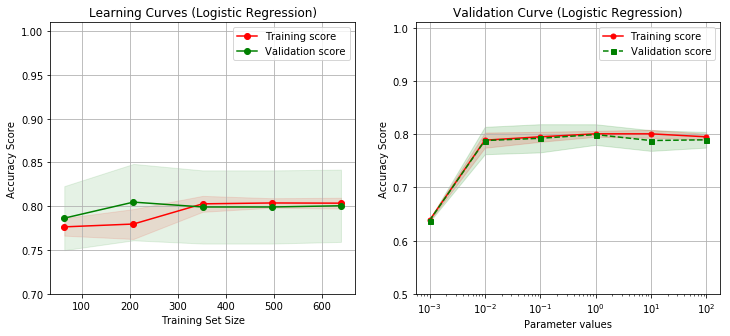

In [7]:
# -----------------------------------------------------
# Run a simple baseline model 
# -----------------------------------------------------
def run_baseline (X, y):
    baseline_pipe = Pipeline([('transform', ct), ('logreg', LogisticRegression())])
    baseline_pipe.fit(X, y)
    scores = cross_val_score(baseline_pipe, X, y, cv=5)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    plot_curves (baseline_pipe, X, y)
    
run_baseline (X_train_df, y_train_df)

In [8]:
# -----------------------------------------------------
# -----------------------------------------------------
class MLFlow(object):
    def __init__(self, transform_estim):
        self.transform_estim = transform_estim
        self.poly_estim = PolynomialFeatures(degree=2)
        self.select_estim = SelectKBest(score_func=chi2)
        self.algo_estim = LogisticRegression()
        self._build_pipe()

    #  
    def preprocess (self, X):
        pipe = Pipeline([
            ('transform', self.transform_estim), 
            ('poly', self.poly_estim), 
            ('selection', self.select_estim) 
        ])
        X_preprocess = pipe.transform (X)
        return (X_preprocess)
        
    #  
    def update_flow (self, best_pipe):
        self.transform_estim = best_pipe.named_steps['transform']
        self.poly_estim = best_pipe.named_steps['poly']
        self.select_estim = best_pipe.named_steps['selection']
        self.algo_estim = best_pipe.named_steps['algo']
        self._build_pipe()
        
    #  
    def print_flow (self):
        print ('Transform step  ', self.transform_estim)
        print ('Poly step  ', self.poly_estim)
        print ('Selection step  ', self.select_estim)
        print ('Algo step  ', self.algo_estim)

    # 
    def _build_pipe (self):
        self.pipe = Pipeline([
            ('transform', self.transform_estim), 
            ('poly', self.poly_estim), 
            ('selection', self.select_estim), 
            ('algo', self.algo_estim)
        ])
        
    # 
    def _stepbystep_preprocess (self, X):
        X_trans = self.transform_estim.transform (X)
        X_poly = self.poly_estim.transform (X_trans)

        # We want to make a column selection filter so we can extract out just the best selected feature columns from
        # the poly dataset. To do this, we make a dummy dataset with a single row whose values are the feature column 
        # indices [0, 1, 2 .... n] for each feature column in the polynomial dataset and then 
        # reshape it to 2D as expected by transform()
        all_column_idxs = np.arange(X_poly.shape[1]).reshape(1,-1)
        # The selection step transformation returns only the selected column indices from the dummy dataset
        selected_idxs = self.select_estim.transform(all_column_idxs)

        # Now use those indices to extract only those selected columns from the poly dataset
        X_preprocess = X_poly[:, selected_idxs[0]]
        return (X_preprocess)

In [9]:
# -----------------------------------------------------
# Use simple Grid Search, not a nested Cross-Validation
# -----------------------------------------------------
def simple_cv_gridsearch (pipe, param_grid, X, y):
    #inner_cv = KFold(n_splits=4, shuffle=True, random_state=0)
    inner_cv = KFold(n_splits=2, shuffle=True, random_state=0)
    gs = GridSearchCV(pipe, param_grid, cv=inner_cv)
    gs.fit (X, y)

    print ('Best params ', gs.best_params_, 'gives unnested score of ', gs.best_score_)

    best_pipe = gs.best_estimator_
    results_df = pd.DataFrame(gs.cv_results_)
    return (best_pipe, results_df)

In [10]:
# -----------------------------------------------------
# Nested cross-validation to find the best combination of hyperparameter 
# values for a given algo. It runs a model for every possible combination
# of values using nested cross-validation, picks the best one and 
# returns the scores for that model.
# Nested CV has an outer loop, for which it uses cross_val_score() and
# an inner loop for which it uses GridSearchCV(). The inner loop selects
# the model with the best hyperparameter combination, and the outer loop
# evaluates that model by estimating its performance score.
# Note that Nested Cross-Validation does not output the model itself, nor
# does it output the hyperparameter values themselves. It only tells you
# what a reliable score would be if such a model was used on new test
# data which has not been provided to the model before. It also outputs
# a GridSearch classifier which can then be fitted with the full training
# data to get the actual model and hyperparameter values. This bit is not
# done below, but in the caller.
# -----------------------------------------------------
def nested_cv_gridsearch (pipe, param_grid, X, y):
    # Scoring methods to evaluate the model performance
    scoring = ['roc_auc', 'accuracy', 'precision', 'recall']
    #scoring = 'accuracy'
    
    # Arrays to store scores
    trial_scores = []

    # Run the nested CV multiple times.
    # Note that these multiple trials is not a requirement of the Nested CV. We are
    # choosing to do it so we can get multiple readings.
    NUM_TRIALS = 1
    NUM_SPLITS = 2
    
    # Repeat for each trial
    for i in range(NUM_TRIALS):

        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
        inner_cv = KFold(n_splits=NUM_SPLITS, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=NUM_SPLITS, shuffle=True, random_state=i)

        # Create the classifier for the inner loop, which does the hyperparameter
        # search by scoring the algo with each combination of hyperparameter values
        # Note that this step only creates the classifier, it does not execute the
        # inner loop here.
        inner_gs = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=inner_cv, 
                           scoring=scoring, n_jobs=4,verbose=0, refit='accuracy')

        # Create the outer loop and pass the inner loop classifier to it. Both the
        # outer loop and inner loop are executed internally within this one line.
        # The outer loop independently evaluates the performance of the hyperparameter
        # combination that was selected by the inner loop. Independent evaluation means
        # that it is tested on a different set of data than that used by the inner
        # loop.
        nested_score = cross_val_score(inner_gs, X=X, y=y, cv=outer_cv)
        
        # nested_score is an array with one score for each iteration of the outer loop
        # Compute the mean and standard deviation of those scores
        # That becomes the mean score and std score for the ith trial
        trial_score = {
            'Accuracy': nested_score.mean() * 100, 
            'Std': nested_score.std() * 100, 
            'Trial' : i
        }
        trial_scores.append (trial_score)

    # The caller can then use this inner_gs to fit the full training data and get
    # the actual model and hyperparameter values. We also return the scores for all
    # the trials
    trial_scores_df = pd.DataFrame (trial_scores)
    avg_accuracy = trial_scores_df ['Accuracy'].mean()
    avg_std = trial_scores_df ['Std'].mean()
    print ('Nested accuracy ', avg_accuracy, 'Nested Std ', avg_std)

    return (inner_gs, trial_scores_df)

# -----------------------------------------------------
# Use the given GridSearch to fit a model with the best hyperparameter values
# Here is where we create the actual model based on the GridSearch
# from the Nested CV
# -----------------------------------------------------
def fit_gs_model (gs, X, y):
    # The given GridSearch has already been seeded with all the hyperparameter 
    # combinations during Nested CV. Fit it again here to get the best
    # combination
    gs.fit(X, y)

    #print ('Best params ', gs.best_params_, 'gives unnested score of ', gs.best_score_)

    # Get the classifier for the best algo found by the gs classifier
    best_model = gs.best_estimator_.named_steps['algo']
    results_df = pd.DataFrame(gs.cv_results_)
    return (best_model, results_df)

In [11]:
def feature_select (flow, X, y):
    # TODO - this function should not be aware of the parameter names like 'selection__'
    # Either pass in the pgrid to this function OR
    # Make this function a method of MLFlow
    pgrid_feature_select = {
        'selection__k': list(range(12, 15)) # 'selection__k': list(range(1, 120))
    }

    best_pipe, fs_results_df = simple_cv_gridsearch (flow.pipe, pgrid_feature_select, X, y)
    
    flow.update_flow (best_pipe)
    flow.print_flow ()
   
    return (fs_results_df)
    
# -----------------------------------------------------
# Run the data pre-processing pipeline including feature selection 
# -----------------------------------------------------
flow = MLFlow(ct)
fs_results_df = feature_select (flow, X_train_df, y_train_df)
fs_results_df[['params', 'mean_test_score']].head(5)

Best params  {'selection__k': 12} gives unnested score of  0.7935393258426966
Transform step   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('title', CreateFeatureTitle(nameCol='Name')), ('cat', TrialCustom(dummy=5)), ('si', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)), ('ohe', OneHotEncoder(categorical_features=None, ca...one, kw_args={'bins': [0, 12, 50, 200]},
          pass_y='deprecated', validate=True))]), ['Age'])])
Poly step   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
Selection step   SelectKBest(k=12, score_func=<function chi2 at 0x7fac28496488>)
Algo step   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='wa

,params,mean_test_score
0,{'selection__k': 12},0.793539
1,{'selection__k': 13},0.793539
2,{'selection__k': 14},0.793539


https://stackoverflow.com/questions/38594734/access-actual-features-after-a-feature-selection-pipeline-in-scikit-learn
https://stackoverflow.com/questions/33376078/python-feature-selection-in-pipeline-how-determine-feature-names

In [12]:
preprocess_train_df = flow.preprocess (X_train_df)
preprocess_test_df = flow.preprocess (X_test_df)
X_train_df.shape, preprocess_train_df.shape, X_test_df.shape, preprocess_test_df.shape
# -----------------------------------------------------
# We can now use this pre-processed data for the subsequent steps
# -----------------------------------------------------

((712, 11), (712, 12), (179, 11), (179, 12))

In [13]:
# -----------------------------------------------------
# Model selection to find the best algo and hyperparameter values
# -----------------------------------------------------
def algo_pgrid ():

    param_grid_dtree = {
            'algo': [DecisionTreeClassifier(random_state=1)],
            'algo__max_depth': list(range(1, 10)) + [None],
            'algo__criterion': ['gini', 'entropy']
        }

    param_grid_logreg = {
            'algo': [LogisticRegression(multi_class='multinomial',
                                  solver='newton-cg',
                                  random_state=1)],
            'algo__penalty': ['l2'],
            'algo__C': np.power(10., np.arange(-4, 4))
        }

    param_grid_svm = {
            'algo': [SVC(random_state=1)],
            'algo__kernel': ['rbf', 'linear'],
            "algo__C": np.power(10., np.arange(-1, 1)),
            "algo__gamma": np.power(10., np.arange(-2, 0))
        }

    param_grid_rforest = {
            'algo': [RandomForestClassifier(n_estimators=20, random_state=1)],
            "algo__max_depth": [3],
            "algo__max_features": [1], 
            "algo__min_samples_split": [2],
            "algo__bootstrap": [True],
            "algo__criterion": ["gini", "entropy"]
        } 

    param_grid_knn = {
            'algo': [KNeighborsClassifier(algorithm='ball_tree',
                                    leaf_size=50)],
            'algo__n_neighbors': list(range(1, 10)),
            'algo__p': [1, 2]
        }

    param_grid_algo = [
        param_grid_dtree,
        param_grid_logreg,
        param_grid_svm,
        param_grid_rforest,
        param_grid_knn
    ]
    
    return (param_grid_algo)


In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

# -----------------------------------------------------
# Ensemble selection to find the best ensemble and hyperparameter values
# -----------------------------------------------------
def ensemble_pgrid (best_clfs):

    # TODO !!! Put in proper selection of estimators
    # Generate weight arrays dynamically based on length of best_clfs
    # Weights can be set to 1/0 to include/exclude estimators
    # Note that weights are not used for Hard Voting, so will need to change below
    voting_estims = [('clf' + str(i), clf) for i, clf in enumerate (best_clfs)]
    param_grid_voting = {
            'algo': [VotingClassifier(voting_estims)],
            'algo__weights': [[1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1]],
            'algo__voting': ['soft']
        }

    param_grid_bagging = {
            'algo': [BaggingClassifier(random_state=1)],
            'algo__base_estimator': best_clfs,
            'algo__n_estimators': list(range(200, 801, 100)),
            'algo__bootstrap': [True, False],
            'algo__max_samples': list(np.arange(0.3, 0.8, 0.2)),
            'algo__max_features': list(np.arange(0.3, 0.8, 0.2))
        }

    param_grid_ada = {
            'algo': [AdaBoostClassifier(random_state=1)],
            'algo__base_estimator': best_clfs,
            'algo__n_estimators': list(range(200, 801, 100)),
            'algo__learning_rate': [0.05, 0.1, 0.2],
        }

    param_grid_gb = {
            'algo': [GradientBoostingClassifier(random_state=1)],
            'algo__n_estimators': list(range(200, 801, 100)),
            'algo__learning_rate': [0.05, 0.1, 0.2],
            'algo__max_depth': list(range(1, 5))
        }

    param_grid_xgb = {
            'algo': [xg.XGBClassifier(random_state=1)],
            'algo__n_estimators': list(range(200, 801, 100)),
            'algo__learning_rate': [0.05, 0.1, 0.2],
            'algo__max_depth': list(range(1, 5))
        }

    param_grid_ensemble = [
        param_grid_voting,
        param_grid_bagging,
        param_grid_ada,
        param_grid_gb,
        param_grid_xgb
    ]

    # NB: TODO This is temporary. Reduce the size of the grid during development to allow
    # the grid search to complete quickly
    # TODO - right now even if we have two ensemblers in here, the computation seems to hang
    # or take extremely long. Need to figure out why, and if needed, loop through each
    # ensemble and run one ensemble at a time 
    param_grid_ensemble = [
        {
            'algo': [xg.XGBClassifier(random_state=1)],
            'algo__n_estimators': list(range(200, 801, 400)),
            'algo__learning_rate': [0.05, 0.1, 0.2],
            'algo__max_depth': list(range(1, 3))
        }
    ]
    
    return (param_grid_ensemble)


'''
        {
            'algo': [AdaBoostClassifier(random_state=1)],
            'algo__base_estimator': [best_clfs[2]],
            'algo__n_estimators': list(range(200, 801, 400)),
            'algo__learning_rate': [0.05, 0.1, 0.2],
        }

'''

"\n        {\n            'algo': [AdaBoostClassifier(random_state=1)],\n            'algo__base_estimator': [best_clfs[2]],\n            'algo__n_estimators': list(range(200, 801, 400)),\n            'algo__learning_rate': [0.05, 0.1, 0.2],\n        }\n\n"

--------------- Simple Grid Search
Best params  {'algo': SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False), 'algo__C': 0.1, 'algo__gamma': 0.01, 'algo__kernel': 'linear'} gives unnested score of  0.8033707865168539
--------------- Nested Grid Search
Nested accuracy  79.63483146067416 Nested Std  1.264044943820225
--------------- Best Model
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
--------------- Ensemble Nested Grid Search
Nested accuracy  80.19662921348313 Nested Std  0.7022471910112349
--------------- Best Model, evaluated combinations =  12
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1,

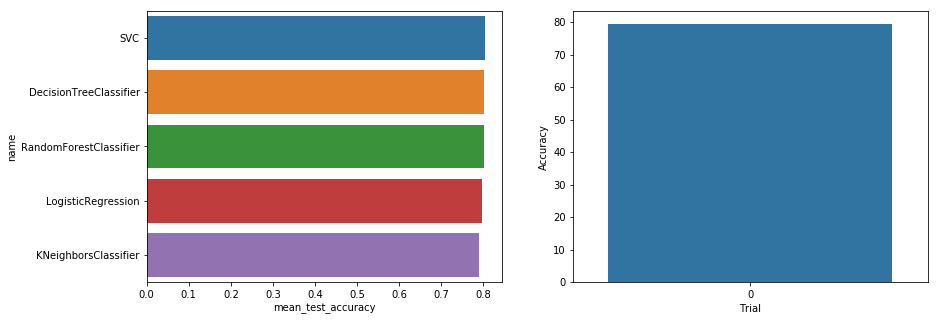

In [15]:
# The LogisticRegression classifier below is a dummy and will be superseded by
# models or ensemblers from the parameter grid
flow.pipe = Pipeline([('algo', LogisticRegression())])

# -----------------------------------------------------
# Show the best results for each algo
# -----------------------------------------------------
def get_best_algos (results_df):
    results_df = results_df[['param_algo', 'mean_test_accuracy']]

    # Extract the algo name from the algo parameter which is an estimator function like 'SVC(C=1.0, cache_size=200,...)'
    results_df['name'] = results_df['param_algo'].astype(str).str.extract('^([A-Za-z]+?)\(', expand=False)

    # One way to get the best algos of each type. We use a better way below that
    # best_algos_df = results_df.groupby('name')['mean_test_accuracy'].max().reset_index().sort_values('mean_test_accuracy', ascending=False)
    
    best_algos_df = results_df.sort_values(['name', 'mean_test_accuracy'], ascending=False).groupby('name').first().sort_values('mean_test_accuracy', ascending=False)

    # Get the best actual classifier objects of each type
    num_clfs = min (4, best_algos_df.shape[0])
    best_clfs = [best_algos_df.iloc[i, 0] for i in range (0, num_clfs)]
    
    return (best_algos_df, best_clfs)

# -----------------------------------------------------
# Get the best algo
# -----------------------------------------------------
def algo_select (flow, X, y):
    # Find the best algo using simple Grid Search, not a nested Cross-Validation
    print ('--------------- Simple Grid Search')
    algo_param_grid = algo_pgrid ()
    simple_best_pipe, simple_results_df = simple_cv_gridsearch (flow.pipe, algo_param_grid, X, y)
    
    print ('--------------- Nested Grid Search')
    nested_gs, trial_scores_df = nested_cv_gridsearch (flow.pipe, algo_param_grid, X, y)
    
    best_model, nested_results_df = fit_gs_model (nested_gs, X, y)
    print ('--------------- Best Model')
    print (best_model)
    
    best_algos_df, best_clfs = get_best_algos (nested_results_df)
    
    # TODO !!!!! Hardcoded !!!!!
    # Must be set on the SVM clf for cross_val_score() to work
    best_clfs[1].probability=True 
    
    print ('--------------- Ensemble Nested Grid Search')
    ensemble_param_grid = ensemble_pgrid (best_clfs)
    ensemble_nested_gs, ensemble_trial_scores_df = nested_cv_gridsearch (flow.pipe, ensemble_param_grid, X, y)
    
    ensemble_best_model, ensemble_nested_results_df = fit_gs_model (ensemble_nested_gs, X, y)
    print ('--------------- Best Model, evaluated combinations = ', ensemble_nested_results_df.shape[0])
    print (ensemble_best_model)
    
    ensemble_best_algos_df, ensemble_best_clfs = get_best_algos (ensemble_nested_results_df)
    
    # TODO - merge the results from the regular algos and the ensembles into a single Dataframe and
    # then find the overall best model
    
    # TODO - Then update the flow with the best model
    #flow.update_flow (best_pipe)
    #flow.print_flow ()
    
    # TODO - And then finally, run the entire flow from beginning to end with the best model and
    # hyperparameters, using X_train_df and not preprocess_train_df. This will be a separate
    # function, not inside here. And after that run with X_test_df and report scores.
    
    return (trial_scores_df, best_algos_df, best_clfs)

trial_scores_df, best_algos_df, best_clfs = algo_select (flow, preprocess_train_df, y_train_df)
fig, axis = plt.subplots(1,2,figsize=(14,5))

sns.barplot (y = best_algos_df.index, x = 'mean_test_accuracy', data = best_algos_df, ax=axis[0])
sns.barplot (x = 'Trial', y = 'Accuracy', data = trial_scores_df, ax=axis[1])

In [17]:
# -----------------------------------------------------
# Format metric values for reporting
# -----------------------------------------------------
def format_metric (metric):
    formatted_metric = float("{0:.2f}".format(100 * metric))
    return (formatted_metric)

# -----------------------------------------------------
# Produce a DataFrame for reporting on the metrics of a fitted model
# TODO the CV Accuracy below is hardcoded
# -----------------------------------------------------
def report_model_metrics (gs, X_train, y_train, X_test, y_test):
    # Predictions on training and test set
    y_pred_train = gs.predict(X_train)
    y_pred_test = gs.predict(X_test)
    
    # Compute metrics based on the predictions
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    precision_test = precision_score(y_true=y_test, y_pred=y_pred_test)
    recall_test = recall_score(y_true=y_test, y_pred=y_pred_test)
    
    # Create a confusion matrix from the predictions
    confmat = confusion_matrix(y_test,y_pred_test)

    metrics = [{'Type':'CV Accuracy', 'Value': format_metric (0.22)},
                {'Type':'Training Accuracy', 'Value' : format_metric (acc_train)},
                {'Type':'Test Accuracy', 'Value' : format_metric (acc_test)},
                {'Type':'Precision', 'Value' : format_metric (precision_test)},
                {'Type':'Recall', 'Value' : format_metric (recall_test)}
             ]
    metrics_df = pd.DataFrame (metrics)
    
    return (metrics_df, confmat)

# -----------------------------------------------------
# Use Test Data for prediction and score reporting
# -----------------------------------------------------
final_model = nested_gs.best_estimator_.named_steps['algo']
metrics_df, confmat = report_model_metrics (final_model, preprocess_train_df, y_train_df, preprocess_test_df, y_test_df)

fig, axis = plt.subplots(1,2,figsize=(14,5))

sns.barplot (y = 'Type', x = 'Value', data = metrics_df, ax=axis[0])
sns.heatmap(confmat,annot=True,fmt='2.0f', ax=axis[1])

NameError: name 'nested_gs' is not defined

### Obsolete Code

In [ ]:
# -----------------------------------------------------
# Run the data pre-processing pipeline including feature selection 
# -----------------------------------------------------
def preprocess (X_train, y_train, X_test):
    feature_select_pipe = Pipeline([
        ('transform', ct), 
        ('poly', PolynomialFeatures(degree=2)), 
        ('selection', SelectKBest(score_func=chi2)), 
        ('algo', LogisticRegression())
    ])

    param_grid = {
        'selection__k': list(range(1, 120))
    }

    gs = GridSearchCV(feature_select_pipe, param_grid, cv=5)
    gs.fit (X_train, y_train)
    print ('Best params ', gs.best_params_, 'gives best score of ', gs.best_score_)
    
    # For the best set of params, transform the data through all the steps to get the dataset 
    # that corresponds to the K Best Features

    best_pipe = gs.best_estimator_

    transform_step = best_pipe.named_steps['transform']
    X_transform_train = transform_step.transform (X_train)

    poly_step = best_pipe.named_steps['poly']
    X_poly_train = poly_step.transform (X_transform_train)

    selection_step = best_pipe.named_steps['selection']
    # We want to make a column selection filter so we can extract out just the best selected feature columns from
    # the poly dataset. To do this, we make a dummy dataset with a single row whose values are the feature column 
    # indices [0, 1, 2 .... n] for each feature column in the polynomial dataset and then 
    # reshape it to 2D as expected by transform()
    all_column_idxs = np.arange(X_poly_train.shape[1]).reshape(1,-1)
    # The selection step transformation returns only the selected column indices from the dummy dataset
    selected_idxs = selection_step.transform(all_column_idxs)

    # Now use those indices to extract only those selected columns from the poly dataset
    X_final_train = X_poly_train[:, selected_idxs[0]]
    
    # Transform the test data also
    X_transform_test = transform_step.transform (X_test)
    X_poly_test = poly_step.transform (X_transform_test)
    X_final_test = X_poly_test[:, selected_idxs[0]]
    
    return (X_final_train, X_final_test)

preprocess_train_df, preprocess_test_df = preprocess (X_train_df, y_train_df, X_test_df)
X_train_df.shape, preprocess_train_df.shape, X_test_df.shape, preprocess_test_df.shape

# -----------------------------------------------------
# Nested cross-validation to find the best combination of hyperparameter 
# values for a given algo. It runs a model for every possible combination
# of values using nested cross-validation, picks the best one and 
# returns the scores for that model.
# Nested CV has an outer loop, for which it uses cross_val_score() and
# an inner loop for which it uses GridSearchCV(). The inner loop selects
# the model with the best hyperparameter combination, and the outer loop
# evaluates that model by estimating its performance score.
# Note that Nested Cross-Validation does not output the model itself, nor
# does it output the hyperparameter values themselves. It only tells you
# what a reliable score would be if such a model was used on new test
# data which has not been provided to the model before. It also outputs
# a GridSearch classifier which can then be fitted with the full training
# data to get the actual model and hyperparameter values. This bit is not
# done below, but in the caller.
# -----------------------------------------------------
def nested_cv_gridsearch (flow, param_grid, X, y):
    # Scoring methods to evaluate the model performance
    scoring = ['roc_auc', 'accuracy', 'precision', 'recall']
    #scoring = 'accuracy'
    
    # Arrays to store scores
    trial_scores = []

    # Run the nested CV multiple times.
    # Note that these multiple trials is not a requirement of the Nested CV. We are
    # choosing to do it so we can get multiple readings.
    NUM_TRIALS = 3
    
    # Repeat for each trial
    for i in range(NUM_TRIALS):

        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

        # Create the classifier for the inner loop, which does the hyperparameter
        # search by scoring the algo with each combination of hyperparameter values
        # Note that this step only creates the classifier, it does not execute the
        # inner loop here.
        inner_gs = GridSearchCV(estimator=flow.pipe, param_grid=algo_grid, cv=inner_cv, 
                           scoring=scoring, n_jobs=1,verbose=0, refit='accuracy')

        # Create the outer loop and pass the inner loop classifier to it. Both the
        # outer loop and inner loop are executed internally within this one line.
        # The outer loop independently evaluates the performance of the hyperparameter
        # combination that was selected by the inner loop. Independent evaluation means
        # that it is tested on a different set of data than that used by the inner
        # loop.
        nested_score = cross_val_score(inner_gs, X=X, y=y, cv=outer_cv)
        
        # nested_score is an array with one score for each iteration of the outer loop
        # Compute the mean and standard deviation of those scores
        # That becomes the mean score and std score for the ith trial
        trial_score = {
            'Accuracy': nested_score.mean() * 100, 
            'Std': nested_score.std() * 100, 
            'Trial' : i
        }
        trial_scores.append (trial_score)

    # The caller can then use this inner_gs to fit the full training data and get
    # the actual model and hyperparameter values. We also return the scores for all
    # the trials
    scores_df = pd.DataFrame (trial_scores)
    avg_accuracy = scores_df ['Accuracy'].mean()
    avg_std = scores_df ['Std'].mean()
    return (scores_df, avg_accuracy, avg_std, inner_gs)

scores_df, nested_accuracy, nested_std, nested_gs = nested_cv_gridsearch (model_selection_pipe, param_grid, preprocess_train_df, y_train_df)
print ('Nested accuracy ', nested_accuracy, 'Nested Std ', nested_std)
scores_df.head()

# -----------------------------------------------------
# Use the given GridSearch to fit a model with the best hyperparameter values
# Here is where we create the actual model based on the GridSearch
# from the Nested CV
# -----------------------------------------------------
def fit_gs_model (gs, X, y):
    # The given GridSearch has already been seeded with all the hyperparameter 
    # combinations during Nested CV. Fit it again here to get the best
    # combination
    gs.fit(X, y)

    # Get the classifier for the best algo found by the gs classifier
    best_model = gs.best_estimator_.named_steps['algo']
    return (best_model, gs.cv_results_, gs.best_params_, gs.best_score_)

best_model, nestedgs_results, best_params, best_score  = fit_gs_model (nested_gs, preprocess_train_df, y_train_df)

print ('Best params ', best_params, 'gives unnested score of ', best_score)
print ('Best Model ', best_model)

# -----------------------------------------------------
# Show the best results for each algo
# -----------------------------------------------------

nestedgs_results_df = pd.DataFrame(nestedgs_results)[['param_algo', 'mean_test_accuracy']]

# Extract the algo name from the algo parameter which is an estimator function like 'SVC(C=1.0, cache_size=200,...)'
nestedgs_results_df['name'] = nestedgs_results_df['param_algo'].astype(str).str.extract('^([A-Za-z]+?)\(', expand=False)

nestedgs_results_df.groupby('name')['mean_test_accuracy'].max().reset_index().sort_values('mean_test_accuracy', ascending=False)